# K-Means Clustering algorithm implementation from scratch.

### - Importing libraries and reading the data.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import datetime as dt
import random
import statistics as st
import math
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'group10.csv')
df.head()

,1.782364208575935152e+02,5.557729419427169404e+01,3.111306154843097005e+01,3.190172943156652607e+01,5.082867444721104278e+01
0,170.073124,46.121755,27.077152,28.016681,47.931412
1,179.125338,57.133051,31.942062,33.041163,51.038269
2,180.965093,55.846377,30.929086,32.024056,52.047072
3,179.039029,57.393111,32.010669,33.029033,50.963679
4,178.935184,55.226819,30.957440,31.981902,50.925238


### - Renaming the columns and checking if any missing data.

In [3]:
df.rename(columns = {'1.782364208575935152e+02':'Height',
                     '5.557729419427169404e+01':'Weight',
                    '3.111306154843097005e+01':'BMI',
                    '3.190172943156652607e+01':'length between the shoulders',
                    '5.082867444721104278e+01':'length of the arms'}, inplace = True)

In [4]:
df.head()

,Height,Weight,BMI,length between the shoulders,length of the arms
0,170.073124,46.121755,27.077152,28.016681,47.931412
1,179.125338,57.133051,31.942062,33.041163,51.038269
2,180.965093,55.846377,30.929086,32.024056,52.047072
3,179.039029,57.393111,32.010669,33.029033,50.963679
4,178.935184,55.226819,30.957440,31.981902,50.925238


In [5]:
df.isnull().sum()

Height                          0
Weight                          0
BMI                             0
length between the shoulders    0
length of the arms              0
dtype: int64

In [6]:
df1= df.copy()

##  1- Normalizing the data to be on the same scale.

In [7]:
normalized_df=(df1-df1.mean())/(df1.std())
normalized_df.head()

,Height,Weight,BMI,length between the shoulders,length of the arms
0,-0.551550,-1.037116,-0.925660,-0.884489,-0.437608
1,0.461048,0.751820,0.613905,0.736996,0.428003
2,0.666846,0.542782,0.293335,0.408759,0.709069
3,0.451393,0.794070,0.635616,0.733082,0.407221
4,0.439777,0.442126,0.302308,0.395155,0.396511


# Function implementation.


## A function made for getting the centroids.
- it checks if it is the first iteration , the centroids will be randomly choosen.
- from the second iteration it will be calculated using the points from each group.

- **Note that:** in the function we enter the normalized_df , we could nourmalized it in the function if required!.

In [8]:
def get_centroid(data_points, iteration, k, groups):
    
    centroids =[]
    
    if iteration == 0: 
        #Choosing random centroid in the first iteration.
        for i in range(k): 
            centroids.append(data_points[np.random.randint(len(data_points))])
            
    else:
        #looping on each group to get the mean of each point to get the centroid.
        for g in range(len(groups)):
            group = groups[g]
            temp = []                                                          #H ,w ,bmi, length shoulder-arms
            #looping on the points inside the sample points ---> ex: sample 1 :[x, y, z,        w,    l]
            for n in range(len(data_points[0])):
                num = 0
                
                for i in range(len(group)):
                    
                    sample_index = group[i]
                    num += data_points[sample_index][n]
                    
                    average = (num / (len(group)))
                    
                # the temp value after each iteration will add the mean of each point # ex: first iter --> [x]    
                temp.append(average)
            #at the end each temp array will represent a centroid in the centroids array --> [ [c1] , [c2] , [c3]  ]
            centroids.append(temp)
    return centroids




# ----------------------------------------------------- COMMENTED BF1 ------------------------------------------------------





def get_centroid(data_points, iteration, k, groups):
    # Create an empty list to store the centroids
    centroids = []
    
    # If this is the first iteration, choose a random centroid for each cluster
    if iteration == 0: 
        for i in range(k): 
            # Choose a random data point as the centroid for the current cluster
            centroids.append(data_points[np.random.randint(len(data_points))])
            
    # If this is not the first iteration, calculate the mean of each group to get the centroid
    else:
        # Loop through each group (i.e. each cluster)
        for g in range(len(groups)):
            # Get the current group
            group = groups[g]
            # Create a list to store the mean of each dimension for the current group
            temp = []
            # Loop through each dimension of the data points
            for n in range(len(data_points[0])):
                # Initialize a sum for the current dimension
                num = 0
                # Loop through each data point in the current group
                for i in range(len(group)):
                    # Get the index of the current data point
                    sample_index = group[i]
                    # Add the value of the current dimension for the current data point to the sum
                    num += data_points[sample_index][n]
                    # Calculate the mean of the current dimension for the current group
                    average = (num / (len(group)))
                # Add the mean of the current dimension to the temp list
                temp.append(average)
            # Add the temp list (i.e. the centroid) to the centroids list
            centroids.append(temp)
    # Return the centroids list
    return centroids

## K_means function 
- **Input:** the function takes the dataframe , k (No. of Clusters) , The no. of iterations.
- **Output:** Array containing the cluster no. that corresponds to the sample.


In [9]:
def k_means_clustering(data , k , iter_numbers):
    #converting the dataframe points into list of lists. [[sample1 points] , [sample2 points]]
    data_points = data.values.tolist()
    centroids = []
    groups = [] #representing the clusters in to groups [[g1] , [g2] , [g3]]
    
    for iteration in range(iter_numbers):

        centroids = get_centroid(data_points,iteration,k,groups)
        clusters = []
        for i in range(len(data_points)):

            distances = []

            for j in range(k):
                c = centroids[j]
                p = data_points[i]
                d = 0
                for n in range(len(c)):
                    d +=((c[n]-p[n])**2) 

                d = math.sqrt(d)
                distances.append(d)


            group_index=distances.index(min(distances)) 
            clusters.append(group_index)
            
            ## by the end of this loop we will have the clusters array representing each sample by the array index
            ## means that if the index was zero this represent sample 1 and array[0] = cluster that it belong to.


            groups = []
            unique_indexes = np.unique(clusters)
            for g in unique_indexes:
                pos = list(np.where(np.array(clusters) == g)[0])
                groups.append(pos)
            
            #representing the clusters in to groups [[g1] , [g2] , [g3]] we will use it to find the new centroid.
    
    return clusters


#------------------------------------------------- COMMENTED BF ---------------------------------------------------------

def k_means_clustering(data , k , iter_numbers):
    
    """
    Perform k-means clustering on a set of data points.
    
    Parameters:
    data (pandas DataFrame): The data points to cluster.
    k (int): The number of clusters to create.
    iter_numbers (int): The number of iterations to perform.
    
    Returns:
    list: A list of integers representing the cluster each data point belongs to.
    """
    
    # Convert the data points from a DataFrame to a list of lists
    data_points = data.values.tolist()
    
    centroids = []  # Initialize an empty list to store the centroids
    groups = []  # Initialize an empty list to store the clusters
    
    # Loop through the specified number of iterations
    for iteration in range(iter_numbers):
        # Calculate the centroids for this iteration
        centroids = get_centroid(data_points, iteration, k, groups)
        
        # Initialize an empty list to store the clusters
        clusters = []
        
        # Loop through the data points
        for i in range(len(data_points)):
            # Initialize an empty list to store the distances to the centroids
            distances = []
            
            # Loop through the centroids
            for j in range(k):
                # Get the current centroid and data point
                c = centroids[j]
                p = data_points[i]
                
                # Calculate the distance between the centroid and data point
                d = 0
                for n in range(len(c)):
                    d += ((c[n] - p[n])**2)
                d = math.sqrt(d)
                
                # Add the distance to the list
                distances.append(d)
                
            # Find the index of the centroid with the minimum distance
            group_index = distances.index(min(distances))
            
            # Add the index of the centroid to the list of clusters
            clusters.append(group_index)
            
  # Find the unique values in the clusters list (i.e. the cluster indexes)
    unique_indexes = np.unique(clusters)

    # Iterate through the unique cluster indexes
    for g in unique_indexes:
        # Find the indices of the data points in the clusters list that belong to the current cluster
        pos = list(np.where(np.array(clusters) == g)[0])
        # Append the indices to the groups list as a list
        groups.append(pos)
    return clusters

## Testing the function on sample1 at: 
- K= 3
- Samples = 1000 


In [10]:
N = 1000
sample1 = normalized_df.sample(n=N)

In [11]:
Clusters1 = k_means_clustering(sample1 , 3 , 5)

### Generating a new column represent each sample1's cluster number.

In [12]:
sample1['Cluster'] = Clusters1
sample1

,Height,Weight,BMI,length between the shoulders,length of the arms,Cluster
70758,1.665517,0.413868,-0.314471,0.429120,1.498799,1
36176,0.337689,-0.448389,-0.635602,-0.563148,0.412960,1
27947,-0.095851,-1.174749,-1.278134,-1.249762,-0.136175,2
1878,1.015515,-0.183125,-0.632797,-0.228578,1.006177,1
55516,-1.561404,-1.765603,-1.291410,-1.834452,-1.549501,2
...,...,...,...,...,...,...
87554,0.243112,-0.795122,-0.973168,-0.880853,0.103130,1
98487,1.229339,-0.034364,-0.610608,0.091049,1.260654,1
57906,-1.672147,-2.058533,-1.596179,-2.184450,-1.541042,2
82832,0.687531,1.479074,1.269003,1.358802,0.729733,0


## Testing the function on sample2 at: 
- K= 5
- Samples = 1000 

In [13]:
N = 1000
sample2 = normalized_df.sample(n=N)

In [14]:
Clusters2 = k_means_clustering(sample2 , 5 , 5)

### Generating a new column represent each sample2's cluster number.

In [15]:
sample2['Cluster'] = Clusters2
sample2

,Height,Weight,BMI,length between the shoulders,length of the arms,Cluster
30182,1.670022,-0.806151,-1.522268,-0.894461,1.554467,4
74123,0.679040,-0.287317,-0.609256,-0.207848,0.675210,4
7646,-1.330836,-1.099137,-0.632425,-1.243336,-1.270289,1
94686,-0.336818,-1.252418,-1.248161,-1.170073,-0.467432,1
58755,-0.112694,-1.472885,-1.587874,-1.542578,-0.147580,1
...,...,...,...,...,...,...
82414,0.334065,1.017965,0.962714,1.009659,0.431315,3
64298,-1.565145,-1.420160,-0.895903,-1.506856,-1.560043,1
26128,-1.576585,-0.145099,0.670945,-0.208507,-1.487892,2
7112,0.893677,-0.193519,-0.606403,-0.237191,0.989856,4


# Graph of the execution time of the K_means clustering algorithm.

## 1- At K = 3 

In [16]:
Ns =[100, 600,  1100,  1600,  2100,  2600,  3100,  3600,  4100, 4600, 5000 , 7000 , 10000 , 15000 ]

import time
timers = []

for i in range(len(Ns)):
    sample = normalized_df.sample(n=Ns[i])
    start = time.time()
    Clusters = k_means_clustering(sample , 3 , 10)
    end = time.time()
    timers.append((end-start))

Text(0, 0.5, 'Time (sec)')

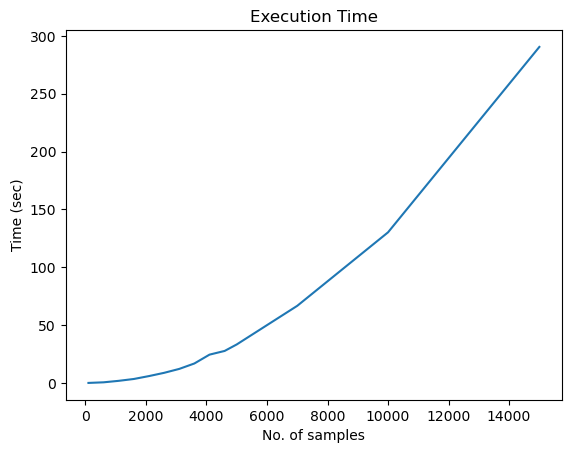

In [17]:
plt.plot(Ns,timers)
plt.title('Execution Time')
plt.xlabel('No. of samples')
plt.ylabel('Time (sec)')

## 2- At K = 5

In [19]:
Ns =[100, 600,  1100,  1600,  2100,  2600,  3100,  3600,  4100, 4600, 5000 , 7000 , 10000 , 15000 ]

import time
timers = []

for i in range(len(Ns)):
    sample = normalized_df.sample(n=Ns[i])
    start = time.time()
    Clusters = k_means_clustering(sample , 5 , 10)
    end = time.time()
    timers.append((end-start))

Text(0, 0.5, 'Time (sec)')

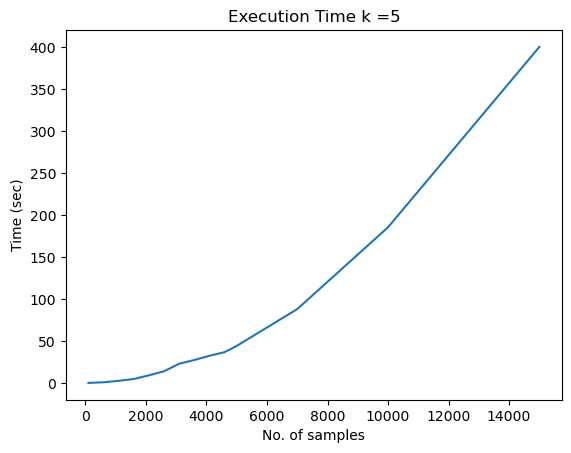

In [20]:
plt.plot(Ns,timers)
plt.title('Execution Time k =5')
plt.xlabel('No. of samples')
plt.ylabel('Time (sec)')

# Milestone 2.

## PCA Function


In [21]:
df_pca = df.copy()

In [22]:
normalized_pca_df=(df_pca-df_pca.mean())/(df_pca.std())
normalized_pca = normalized_pca_df.values.tolist()

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(normalized_pca)

PCA(n_components=2)

In [24]:
x_pca = pca.transform(normalized_pca)
x_pca

array([[-1.76534217,  0.26613236],
       [ 1.36874199, -0.08332799],
       [ 1.12421413,  0.4647206 ],
       ...,
       [-1.53533961,  0.62040911],
       [ 0.04835239,  2.72665303],
       [-2.7657177 ,  0.1216234 ]])

## Applying the k_means function on the reduced data by PCA

In [25]:
df_pc1 = pd.DataFrame(x_pca)

# Taking 1000 samples and k = 3

In [26]:
sample_pca = df_pc1.sample(n=1000)
Clusters_pca = k_means_clustering(sample_pca , 3, 10)

## Ploting the clusters in different colors.

Text(0.5, 1.0, 'K =3')

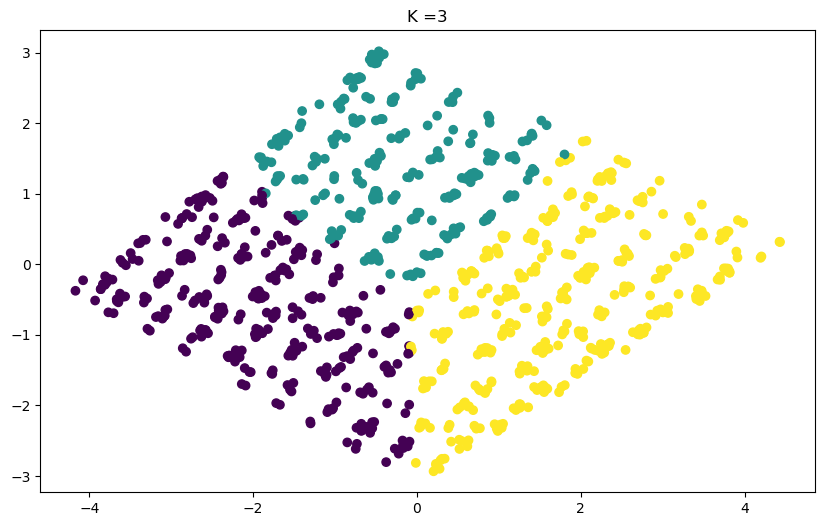

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(x=sample_pca.iloc[:,0], y=sample_pca.iloc[:,1], c=Clusters_pca)
plt.title('K =3')

## Percentage of each Cluster at K = 3.

In [28]:
Percentages = []
unique_indexes = np.unique(Clusters_pca)
for g in unique_indexes:
    groups = []
    pos = list(np.where(np.array(Clusters_pca) == g)[0])
    Percentages.append((len(pos)/len(Clusters_pca)) * 100)
    
print(Percentages)

[35.6, 25.3, 39.1]


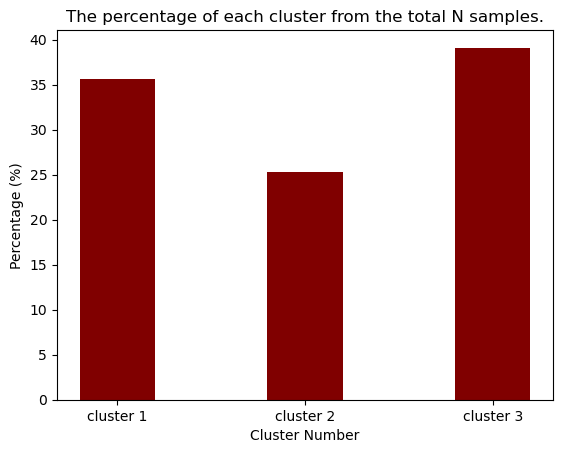

In [29]:
C = ["cluster 1" , "cluster 2" , "cluster 3"]
plt.bar(C, Percentages, color ='maroon', width = 0.4)
 
plt.xlabel("Cluster Number")
plt.ylabel("Percentage (%)")
plt.title("The percentage of each cluster from the total N samples.")
plt.show()

# Taking 1000 samples and k = 5

In [30]:
sample_pca = df_pc1.sample(n=1000)
Clusters_pca = k_means_clustering(sample_pca , 5, 10)

Text(0.5, 1.0, 'K =5')

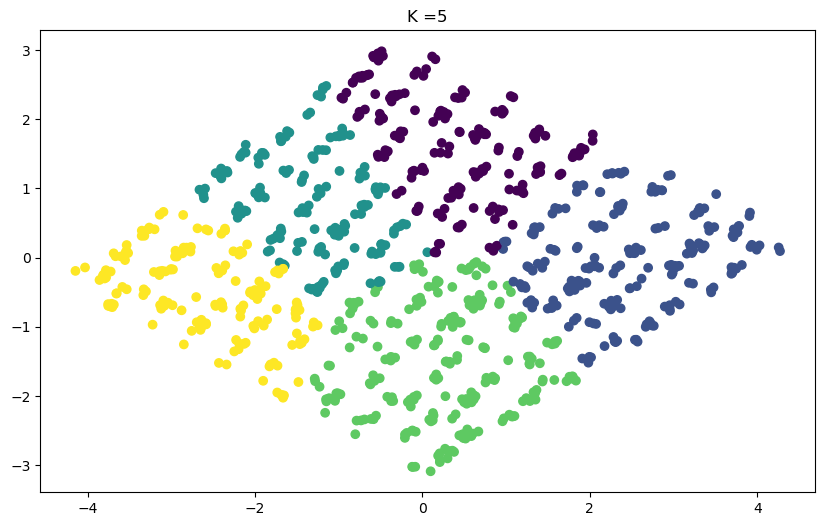

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(x=sample_pca.iloc[:,0], y=sample_pca.iloc[:,1], c=Clusters_pca)
plt.title('K =5')

## Percentage of each Cluster at K = 5.

In [32]:
Percentages = []
unique_indexes = np.unique(Clusters_pca)
for g in unique_indexes:
    groups = []
    pos = list(np.where(np.array(Clusters_pca) == g)[0])
    Percentages.append((len(pos)/len(Clusters_pca)) * 100)
    
print(Percentages)

[18.5, 22.5, 17.1, 24.9, 17.0]


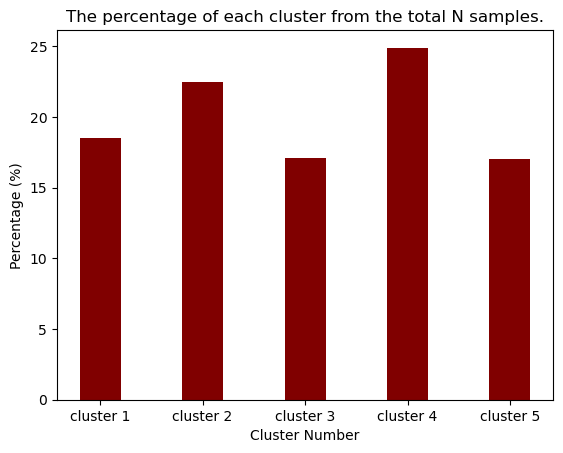

In [33]:
C = ["cluster 1" , "cluster 2" , "cluster 3" , "cluster 4", "cluster 5"]
plt.bar(C, Percentages, color ='maroon', width = 0.4)
 
plt.xlabel("Cluster Number")
plt.ylabel("Percentage (%)")
plt.title("The percentage of each cluster from the total N samples.")
plt.show()

## Execution time after PCA.

In [42]:
Ns =[100, 600,  1100,  1600,  2100,  2600,  3100,  3600,  4100, 4600]

import time
timers = []

for i in range(len(Ns)):
    sample = df_pc1.sample(n=Ns[i])
    start = time.time()
    Clusters = k_means_clustering(sample , 3 , 10)
    end = time.time()
    timers.append((end-start))

Text(0, 0.5, 'Time (sec)')

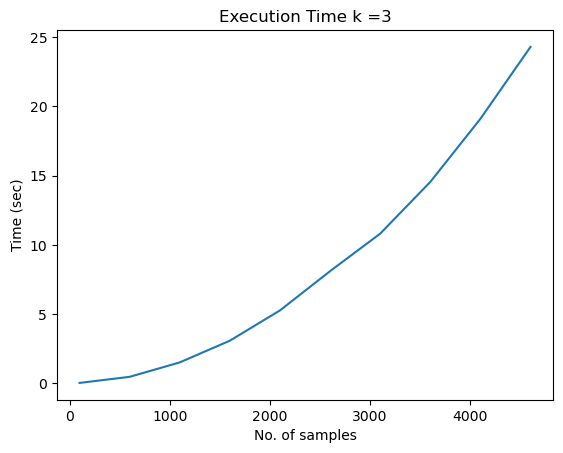

In [43]:
plt.plot(Ns,timers)
plt.title('Execution Time k =3')
plt.xlabel('No. of samples')
plt.ylabel('Time (sec)')

In [49]:
Ns =[100, 600,  1100,  1600,  2100,  2600,  3100,  3600,  4100, 4600]

import time
timers = []

for i in range(len(Ns)):
    sample = df_pc1.sample(n=Ns[i])
    start = time.time()
    Clusters = k_means_clustering(sample , 5 , 10)
    end = time.time()
    timers.append((end-start))

Text(0, 0.5, 'Time (sec)')

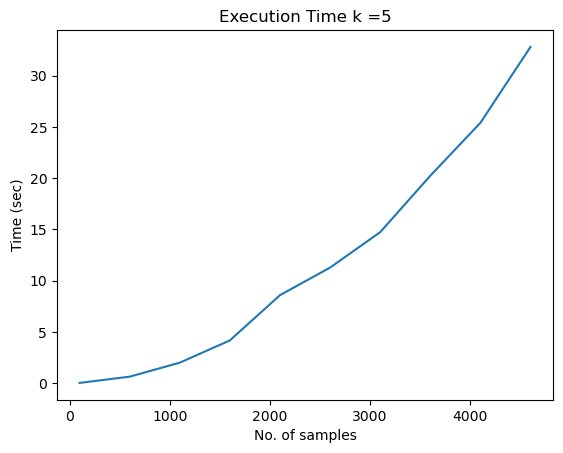

In [50]:
plt.plot(Ns,timers)
plt.title('Execution Time k =5')
plt.xlabel('No. of samples')
plt.ylabel('Time (sec)')

# Extra confirmation on our code accuracy by comparing to the predefined K_means.

## Choosing 2 columns which are known, Only for testing!.

In [51]:
testing = normalized_df.drop(['BMI', 'length between the shoulders' , 'length of the arms'], axis = 'columns')
testing.head()

,Height,Weight
0,-0.551550,-1.037116
1,0.461048,0.751820
2,0.666846,0.542782
3,0.451393,0.794070
4,0.439777,0.442126


## Applying **Our** K_means_clustering.
- at k = 5.

In [58]:
testing_sample = testing.sample(n=100)
Clusters_test = k_means_clustering(testing_sample , 5, 10)

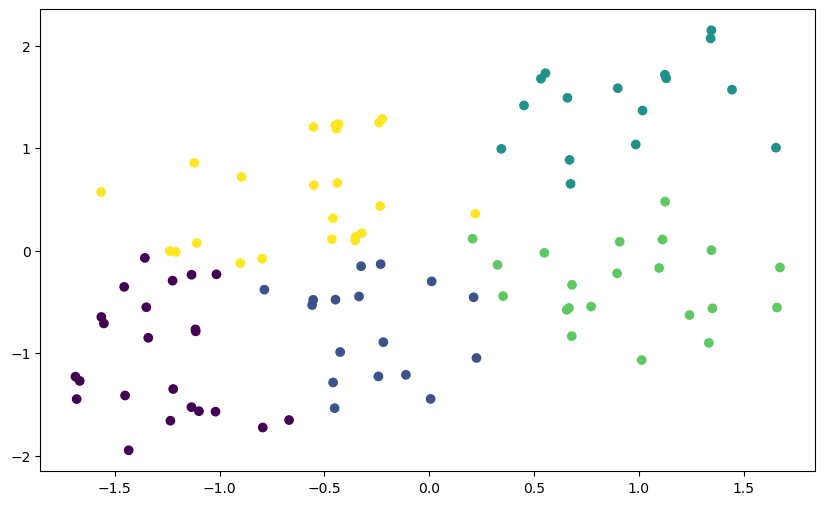

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(x= testing_sample.iloc[:,0], y=testing_sample.iloc[:,1], c=Clusters_test)

## Using Pre- Defined

In [60]:
from sklearn.cluster import KMeans

In [63]:
km2 = KMeans(n_clusters=5)
x_clustered = km2.fit_predict(testing_sample)

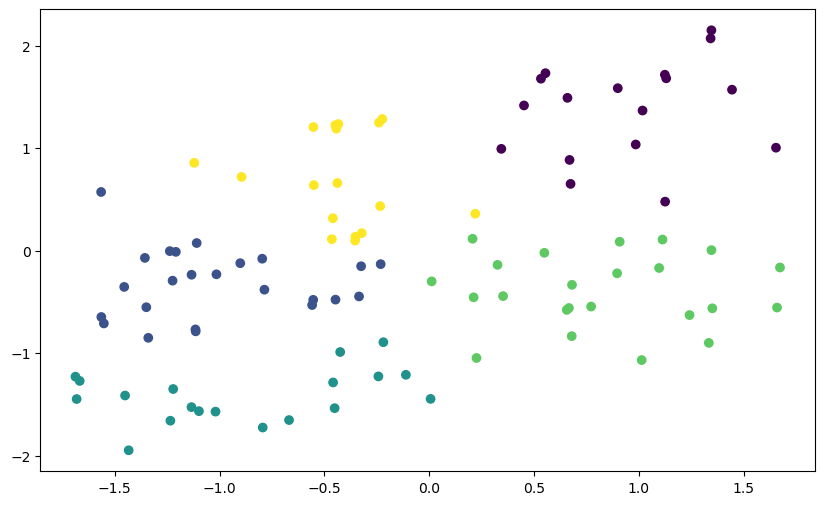

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x= testing_sample.iloc[:,0], y=testing_sample.iloc[:,1], c=x_clustered)

# The END :))))